# WDL | Stage 4 - EDA

### - Attracting Population to Green Spaces in Metropolitan Areas

In [7]:
import pandas as pd
import numpy as np
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [9]:
green_df = pd.read_csv('WDL_Green_Areas_Dataset_V1.csv', sep='|', encoding='latin-1')

In [10]:
green_df

Green_Zone_name  \
0     ESPAÇO JOGO E RECREIO HOMEM DO LEME   
1     ESPAÇO JOGO E RECREIO HOMEM DO LEME   
2            JARDIM AFONSO DE ALBUQUERQUE   
3            JARDIM AFONSO DE ALBUQUERQUE   
4     JARDIM ALAMEDA CIDADE UNIVERSITÁRIA   
5     JARDIM ALAMEDA CIDADE UNIVERSITÁRIA   
6     JARDIM ALAMEDA DOM AFONSO HENRIQUES   
7     JARDIM ALAMEDA DOM AFONSO HENRIQUES   
8                 JARDIM AMÁLIA RODRIGUES   
9                 JARDIM AMÁLIA RODRIGUES   
10              JARDIM AMÉLIA CARVALHEIRA   
11              JARDIM AMÉLIA CARVALHEIRA   
12                   JARDIM ANTÓNIO NOBRE   
13                   JARDIM ANTÓNIO NOBRE   
14                  JARDIM AVELAR BROTERO   
15                  JARDIM AVELAR BROTERO   
16                   JARDIM BASÍLIO TELES   
17                   JARDIM BASÍLIO TELES   
18                   JARDIM BENTO MARTINS   
19                   JARDIM BENTO MARTINS   
20                 JARDIM BOTÂNICO LISBOA   
21                 JARDIM BOTÂNICO LISBOA   
22                  JARDIM BOTÂNICO PORTO   
23                  JARDIM BOTÂNICO PORTO   
24                JARDIM BRAAMCAMP FREIRE   
25                JARDIM BRAAMCAMP FREIRE   
26                     JARDIM CONSTANTINO   
27                     JARDIM CONSTANTINO   
28                     JARDIM DA BOAVISTA   
29                     JARDIM DA BOAVISTA   
30                    JARDIM DA CORUJEIRA   
31                    JARDIM DA CORUJEIRA   
32                          JARDIM DA LUZ   
33                          JARDIM DA LUZ   
34             JARDIM DA RIBEIRA DAS NAUS   
35             JARDIM DA RIBEIRA DAS NAUS   
36                   JARDIM DAS AMOREIRAS   
37                   JARDIM DAS AMOREIRAS   
38                      JARDIM DE BUCELAS   
39                      JARDIM DE BUCELAS   
40            JARDIM DE LOPES DE MENDONÇA   
41            JARDIM DE LOPES DE MENDONÇA   
42                       JARDIM DE SANTOS   
43                       JARDIM DE SANTOS   
44                JARDIM DE TEÓFILO BRAGA   
45                JARDIM DE TEÓFILO BRAGA   
46                 JARDIM DO ARCO DO CEGO   
47                 JARDIM DO ARCO DO CEGO   
48                 JARDIM DO CAMPO GRANDE   
49                 JARDIM DO CAMPO GRANDE   
50                JARDIM DO CAMPO PEQUENO   
51                JARDIM DO CAMPO PEQUENO   
52             JARDIM DO PALÁCIO DA BOLSA   
53             JARDIM DO PALÁCIO DA BOLSA   
54       JARDIM DO PALÁCIO DE BEAU-SÉJOUR   
55       JARDIM DO PALÁCIO DE BEAU-SÉJOUR   
56           JARDIM DO PALÁCIO DE CRISTAL   
57           JARDIM DO PALÁCIO DE CRISTAL   
58                JARDIM DO PRÍNCIPE REAL   
59                JARDIM DO PRÍNCIPE REAL   
60                      JARDIM DOM LUÍS I   
61                      JARDIM DOM LUÍS I   
62                  JARDIM FERNANDO PESSA   
63                  JARDIM FERNANDO PESSA   
64       JARDIM FRANCISCO CALDEIRA CABRAL   
65       JARDIM FRANCISCO CALDEIRA CABRAL   
66           JARDIM FRANCISCO SÁ CARNEIRO   
67           JARDIM FRANCISCO SÁ CARNEIRO   
68    JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN   
69    JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN   
70                    JARDIM GARCIA DORTA   
71                    JARDIM GARCIA DORTA   
72                      JARDIM IRMÃ LÚCIA   
73                      JARDIM IRMÃ LÚCIA   
74         JARDIM JOÃO FREDERICO LUDOVICE   
75         JARDIM JOÃO FREDERICO LUDOVICE   
76                   JARDIM LISBOA ANTIGA   
77                   JARDIM LISBOA ANTIGA   
78                   JARDIM NOVE DE ABRIL   
79                   JARDIM NOVE DE ABRIL   
80                   JARDIM PAULO VALLADA   
81                   JARDIM PAULO VALLADA   
82      JARDIM PROF. ANTÓNIO SOUSA FRANCO   
83      JARDIM PROF. ANTÓNIO SOUSA FRANCO   
84      JRD. CP. VINTE E QUATRO DE AGOSTO   
85      JRD. CP. VINTE E QUATRO DE AGOSTO   
86                        MATA DE BENFICA   
87                        MATA DE BENFICA   
88             PARQUE

In [11]:
#Creating a new column with the daily average of non-residents in influence area and ordering the df 

rule = pd.Series(green_df[green_df['Resident'] == 1]['Daily average of people in influence area'].values, index = green_df['Green_Zone_name'].unique()).to_dict()

green_df['Daily average of people in influence area (Non-Residents)'] = green_df['Green_Zone_name'].map(rule)

green_df = green_df.drop(green_df[green_df.Resident == 1].index).reset_index()

green_df = green_df.drop('Resident', axis = 1)

green_df = green_df[['Green_Zone_name', 'Number of Museums in influence area', 
                     'Number of parking lots in influence area', 'Number of tourist attractions in influence area', 
                     'Green Zones Daily Average Demand', 'Daily average of people in influence area', 
                     'Daily average of people in influence area (Non-Residents)', 'Number of buildings in influence area', 
                     'Number of families in influence area','Number of people resident in influence area', 
                     'perc_senior_pop', 'perc_pop_until_19_yo', 'POINT_X', 'POINT_Y']]

green_df

Green_Zone_name  Number of Museums in influence area  \
0    ESPAÇO JOGO E RECREIO HOMEM DO LEME                                    5   
1           JARDIM AFONSO DE ALBUQUERQUE                                   93   
2    JARDIM ALAMEDA CIDADE UNIVERSITÁRIA                                    8   
3    JARDIM ALAMEDA DOM AFONSO HENRIQUES                                  105   
4                JARDIM AMÁLIA RODRIGUES                                    8   
5              JARDIM AMÉLIA CARVALHEIRA                                  104   
6                   JARDIM ANTÓNIO NOBRE                                   93   
7                  JARDIM AVELAR BROTERO                                   10   
8                   JARDIM BASÍLIO TELES                                   38   
9                   JARDIM BENTO MARTINS                                    5   
10                JARDIM BOTÂNICO LISBOA                                  105   
11                 JARDIM BOTÂNICO PORTO                                   25   
12               JARDIM BRAAMCAMP FREIRE                                   99   
13                    JARDIM CONSTANTINO                                  105   
14                    JARDIM DA BOAVISTA                                   19   
15                   JARDIM DA CORUJEIRA                                    5   
16                         JARDIM DA LUZ                                    0   
17            JARDIM DA RIBEIRA DAS NAUS                                   72   
18                  JARDIM DAS AMOREIRAS                                   13   
19                     JARDIM DE BUCELAS                                    0   
20           JARDIM DE LOPES DE MENDONÇA                                   97   
21                      JARDIM DE SANTOS                                   77   
22               JARDIM DE TEÓFILO BRAGA                                   16   
23                JARDIM DO ARCO DO CEGO                                   91   
24                JARDIM DO CAMPO GRANDE                                  107   
25               JARDIM DO CAMPO PEQUENO                                  104   
26            JARDIM DO PALÁCIO DA BOLSA                                   21   
27      JARDIM DO PALÁCIO DE BEAU-SÉJOUR                                    1   
28          JARDIM DO PALÁCIO DE CRISTAL                                   21   
29               JARDIM DO PRÍNCIPE REAL                                   73   
30                     JARDIM DOM LUÍS I                                  101   
31                 JARDIM FERNANDO PESSA                                   82   
32      JARDIM FRANCISCO CALDEIRA CABRAL                                    2   
33          JARDIM FRANCISCO SÁ CARNEIRO                                    2   
34   JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN                                   92   
35                   JARDIM GARCIA DORTA                                    3   
36                     JARDIM IRMÃ LÚCIA                                   14   
37        JARDIM JOÃO FREDERICO LUDOVICE                                    1   
38                  JARDIM LISBOA ANTIGA                                   73   
39                  JARDIM NOVE DE ABRIL                                  106   
40                  JARDIM PAULO VALLADA                                    0   
41     JARDIM PROF. ANTÓNIO SOUSA FRANCO                                   90   
42     JRD. CP. VINTE E QUATRO DE AGOSTO                                    0   
43                       MATA DE BENFICA                                    0   
44            PARQUE DA CIDADE DE LOURES                                    1   
45                   PARQUE DE SÃO ROQUE                                    3   
46                      PARQUE DOS ANJOS                                   46   
47                    PARQUE EDUARDO VII                                  107   
48       PARQUE INFANTIL CONDE DE BONFIM                

In [12]:
#Checking the longitudes to split the data between Lisboa and Porto areas

np.sort(green_df.POINT_Y.unique())

array([38.69674, 38.6996 , 38.70389, 38.70463, 38.70596, 38.7069 ,
       38.70705, 38.71166, 38.71502, 38.71662, 38.71742, 38.72178,
       38.72313, 38.72835, 38.72961, 38.73036, 38.73062, 38.7312 ,
       38.73467, 38.73638, 38.73755, 38.73757, 38.73805, 38.73919,
       38.73925, 38.73955, 38.7398 , 38.74128, 38.74231, 38.74308,
       38.74359, 38.74581, 38.74607, 38.74694, 38.74836, 38.74978,
       38.75181, 38.75294, 38.75482, 38.75755, 38.76014, 38.76021,
       38.76039, 38.76933, 38.76993, 38.77121, 38.78463, 38.79484,
       38.79877, 38.82598, 38.90102, 41.14118, 41.14839, 41.14934,
       41.15261, 41.15402, 41.15438, 41.15769, 41.15806, 41.15984,
       41.16001, 41.16273, 41.17106, 41.18237])

In [13]:
#Adding a column to the df with the city information

green_df['city'] = green_df['POINT_Y'].apply(lambda x: 'Porto' if x > 38.90102 else 'Lisboa')

In [14]:
geo_df = gpd.GeoDataFrame(
    green_df, geometry = gpd.points_from_xy(green_df.POINT_X, green_df.POINT_Y))

geo_df.crs = "EPSG:4326"
geo_df = geo_df.to_crs(epsg=3857)

In [15]:
geo_df.head()

Green_Zone_name  Number of Museums in influence area  \
0  ESPAÇO JOGO E RECREIO HOMEM DO LEME                                    5   
1         JARDIM AFONSO DE ALBUQUERQUE                                   93   
2  JARDIM ALAMEDA CIDADE UNIVERSITÁRIA                                    8   
3  JARDIM ALAMEDA DOM AFONSO HENRIQUES                                  105   
4              JARDIM AMÁLIA RODRIGUES                                    8   

   Number of parking lots in influence area  \
0                                        28   
1                                       129   
2                                        23   
3                                       175   
4                                         8   

   Number of tourist attractions in influence area  \
0                                               30   
1                                               78   
2                                                4   
3                                               84   
4                                                4   

   Green Zones Daily Average Demand  \
0                          3.728677   
1                         10.259113   
2                         47.347816   
3                         41.485945   
4                          5.768512   

   Daily average of people in influence area  \
0                               45787.629298   
1                               42877.741202   
2                               42877.741202   
3                                6008.626849   
4                               32809.647241   

   Daily average of people in influence area (Non-Residents)  \
0                                       17780.803014           
1                                       17497.825376           
2                                       17497.825376           
3                                       17235.051457           
4                                        7104.740926           

   Number of buildings in influence area  \
0                                   4783   
1                                   1775   
2                                   1775   
3                                   5028   
4                                   2472   

   Number of families in influence area  \
0                                 15352   
1                                 17185   
2                                 17185   
3                                 10598   
4                                  6729   

   Number of people resident in influence area  perc_senior_pop  \
0                                        38012         0.195123   
1                                        41163         0.161747   
2                                        41163         0.161747   
3                                        27362         0.161501   
4                                        15460         0.240815   

   perc_pop_until_19_yo  POINT_X   POINT_Y    city  \
0              0.196017 -8.68415  41.16001   Porto   
1              0.204917 -9.19949  38.69674  Lisboa   
2              0.204917 -9.15757  38.75294  Lisboa   
3              0.209341 -9.13207  38.73757  Lisboa   
4              0.163131 -9.15459  38.73062  Lisboa   

                           geometry  
0   POINT (-966715.156 5035971.828)  
1  POINT (-1024082.542 4678324.805)  
2  POINT (-1019416.029 4686343.881)  
3  POINT (-1016577.382 4684150.137)  
4  POINT (-1019084.297 4683158.326)

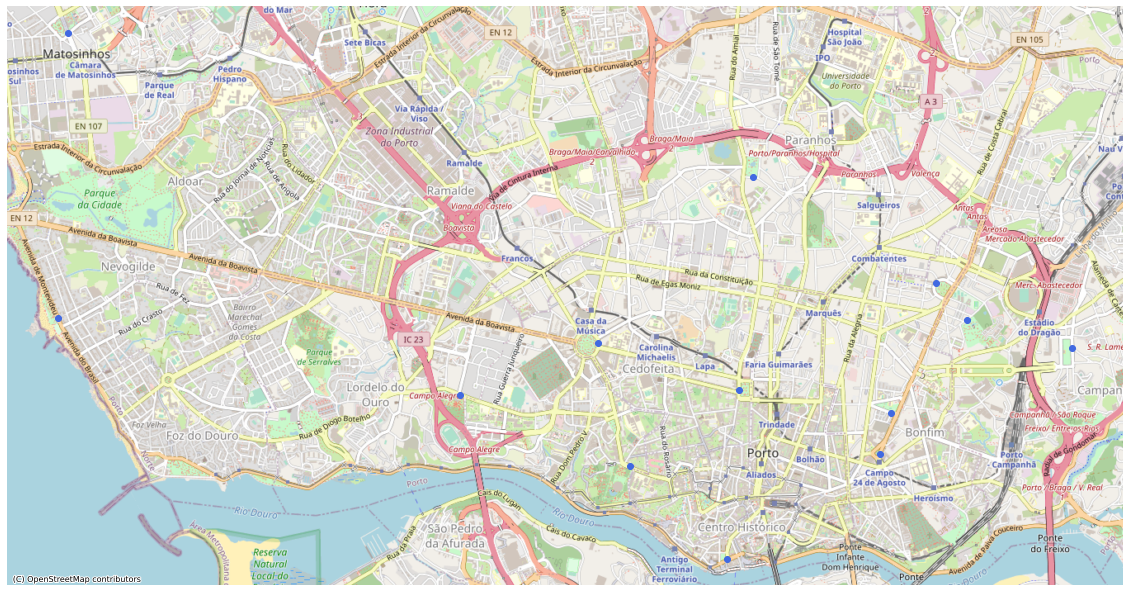

In [16]:
# Plotting the green spaces for Porto

ax = geo_df[geo_df.city == 'Porto']['geometry'].plot(figsize=(20, 20), color = 'royalblue', alpha = 1)

ctx.add_basemap(ax, source = ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()

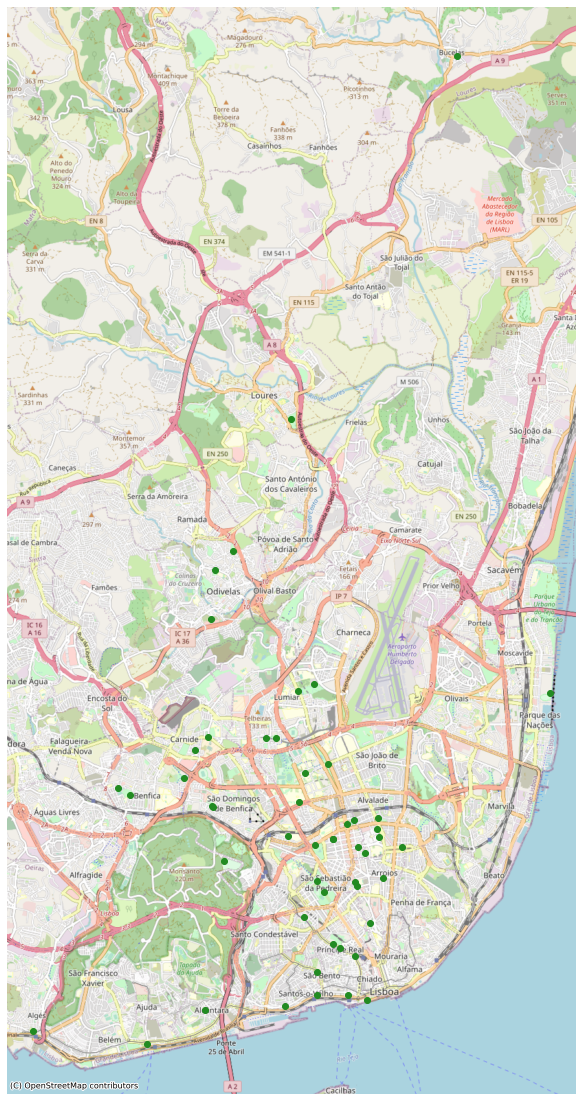

In [17]:
# Plotting the green spaces for Lisboa

ax = geo_df[geo_df.city == 'Lisboa']['geometry'].plot(figsize=(20, 20), color = 'forestgreen', alpha = 1)

ctx.add_basemap(ax, source = ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()

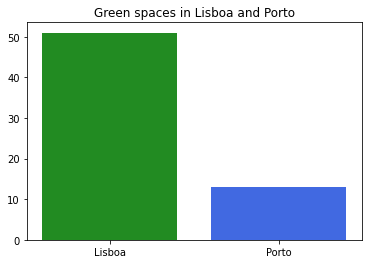

In [18]:
# Plotting the number of green spaces in both locations
plt.bar(x=["Lisboa", "Porto"], 
        height=[green_df[green_df.city == 'Lisboa']['Green_Zone_name'].nunique(), green_df[green_df.city == 'Porto']['Green_Zone_name'].nunique()],
        color = ['forestgreen', 'royalblue'])

plt.title('Green spaces in Lisboa and Porto')
plt.show()

# Insights 

- There is a lot more green spaces in lisbon than in Porto (at least in this dataset). The reality is that, [XXX article]

- [It's important to note that Porto already has some projects in development to rehabilitate and expand the already built green spaces.](https://www.publico.pt/2020/11/23/local/noticia/camara-porto-seis-projectos-reabilitacao-expansao-parques-jardins-1940318) So, although it seems like it wasn't a priority in the past, [Porto is taking some steps to turn 'greener'.](https://ambiente.cm-porto.pt/estrutura-verde/estrutura-verde) 

- Most of the green areas in Lisbon are really condensend in the 'old'/turistic part of town and closer to the sea, although we can actually see some green spaces in urban areas of the perifery, like São Domingos de Benfica and Carnide.

- There has been a trend for quite some time in Lisbon to build more cycling roads, changing how roads are built and the addition of even more green social places. A very important segment of the city called [Praça de Espanha has been revamped and updated to be more green, more of a leisure space and (much) less traffic intense than before.](https://www.lisboa.pt/nova-praca-de-espanha) 

- We can see in the previous link that Lisbon was also the European Green Capital, with a strong focus on having a more vivid ecossytem, better air quality and a space that can also avoid floods, sometinh gthat affects this part of town and will most likely get worse with the increasing climatic changes.


In [64]:
geo_df.sort_values(by="Green Zones Daily Average Demand", ascending=False).head(3)

Green_Zone_name  Number of Museums in influence area  \
42    JRD. CP. VINTE E QUATRO DE AGOSTO                                    0   
34  JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN                                   92   
44           PARQUE DA CIDADE DE LOURES                                    1   

    Number of parking lots in influence area  \
42                                         1   
34                                        93   
44                                         9   

    Number of tourist attractions in influence area  \
42                                                0   
34                                               58   
44                                                4   

    Green Zones Daily Average Demand  \
42                       3193.372906   
34                       1291.870084   
44                       1047.505649   

    Daily average of people in influence area  \
42                               52834.126879   
34                               36577.848107   
44                                6008.626849   

    Daily average of people in influence area (Non-Residents)  \
42                                       16782.664422           
34                                       30892.425376           
44                                       17235.051457           

    Number of buildings in influence area  \
42                                   5428   
34                                   3521   
44                                   5028   

    Number of families in influence area  \
42                                 10994   
34                                 24581   
44                                 10598   

    Number of people resident in influence area  perc_senior_pop  \
42                                        24265         0.271337   
34                                        59559         0.161672   
44                                        27362         0.161501   

    perc_pop_until_19_yo   POINT_X   POINT_Y    city  \
42              0.149062 -8.598670  41.14934   Porto   
34              0.197283 -9.155130  38.73805  Lisboa   
44              0.209341 -9.161535  38.82598  Lisboa   

                            geometry  
42   POINT (-957199.566 5034394.297)  
34  POINT (-1019144.410 4684218.640)  
44  POINT (-1019857.411 4696775.266)

# Insights 

- Maybe unexpectedly, Porto has the green space that is most visited: 24 de Agosto is the most visited (by far!) with no museums and only 1 parking lot! Surprising! **But why?** The reason is simple: **[it's a huge accessibility center: the bus stops are huge and there is a huge variety of destinations that citizens can access through this point, either from bus or from train.](https://pt.wikipedia.org/wiki/Campo_de_Vinte_e_Quatro_de_Agosto)** This is the most important factor for this green space in specific and it's not reflected in this dataset.

- It's funny to see the Top 2 green spaces have a strong demand for two completely different reasons: the first one is mainly an access point with great accessibility; the second one, although it has great accessibility too (subway, numerous bus stops and even a great number of parking lots), people go there mainly for **culture and/or leisure time**. Goulbenkian always has multiple cultural events happening, from art exhibitions to live concerts or cinema being reproduced. It is also a really important cultural mark in the city. The garden is also open to the public and really well maintained and conserved, which makes it a really well-known attraction in the middle of a very urban part of town.

- The third most demanded park, Parque da Cidade de Loures, on the other hand, also serves a completely different purpose: [**it's mainly a family place,** with two parks for kids with activities for them and a space/big gymnasium that is used for several sports pratice or different activities](https://www.allaboutportugal.pt/pt/loures/jardins/parque-da-cidade-de-loures)

The insight taken from this is: different green spaces have different purposes and that matters when analyzing the demand and understanding what went right and wrong. Is it a point that unites various transportations points and intersections of the city? Is it of cultural importance? Is it for kids and families? Is it close to a viewpoint (a.k.a. miradouro)? Unfortunately, this variable is not created in our dataset, but it's something that we think would help a model perform and to understand in general the demand for these spaces in different locations of the cities. It would be enough to create a column called "purpose" with maybe less than 10 different categorical values that it could take.

Another insight is that **there is no demand if there is no accessibility**. All the top gardens have great access, either by road or by public transportation. This is crucial for the success of a green space and is crucial for making the community engaged with the space. It's really important to have this in mind when picking where the next green spaces should be built. That's why we recommend to unite this dataset with a column named "Number of Public Transportation Routes" that represents the number of public transportation routes that one can takes from there and from where the population can come from.

In [20]:
df_lisboa = green_df[green_df['city'] == 'Lisboa']

df_porto = green_df[green_df['city'] == 'Porto']

df_lisboa

Green_Zone_name  Number of Museums in influence area  \
1           JARDIM AFONSO DE ALBUQUERQUE                                   93   
2    JARDIM ALAMEDA CIDADE UNIVERSITÁRIA                                    8   
3    JARDIM ALAMEDA DOM AFONSO HENRIQUES                                  105   
4                JARDIM AMÁLIA RODRIGUES                                    8   
5              JARDIM AMÉLIA CARVALHEIRA                                  104   
6                   JARDIM ANTÓNIO NOBRE                                   93   
7                  JARDIM AVELAR BROTERO                                   10   
9                   JARDIM BENTO MARTINS                                    5   
10                JARDIM BOTÂNICO LISBOA                                  105   
12               JARDIM BRAAMCAMP FREIRE                                   99   
13                    JARDIM CONSTANTINO                                  105   
16                         JARDIM DA LUZ                                    0   
17            JARDIM DA RIBEIRA DAS NAUS                                   72   
18                  JARDIM DAS AMOREIRAS                                   13   
19                     JARDIM DE BUCELAS                                    0   
20           JARDIM DE LOPES DE MENDONÇA                                   97   
21                      JARDIM DE SANTOS                                   77   
23                JARDIM DO ARCO DO CEGO                                   91   
24                JARDIM DO CAMPO GRANDE                                  107   
25               JARDIM DO CAMPO PEQUENO                                  104   
27      JARDIM DO PALÁCIO DE BEAU-SÉJOUR                                    1   
29               JARDIM DO PRÍNCIPE REAL                                   73   
30                     JARDIM DOM LUÍS I                                  101   
31                 JARDIM FERNANDO PESSA                                   82   
32      JARDIM FRANCISCO CALDEIRA CABRAL                                    2   
34   JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN                                   92   
35                   JARDIM GARCIA DORTA                                    3   
36                     JARDIM IRMÃ LÚCIA                                   14   
37        JARDIM JOÃO FREDERICO LUDOVICE                                    1   
38                  JARDIM LISBOA ANTIGA                                   73   
39                  JARDIM NOVE DE ABRIL                                  106   
41     JARDIM PROF. ANTÓNIO SOUSA FRANCO                                   90   
43                       MATA DE BENFICA                                    0   
44            PARQUE DA CIDADE DE LOURES                                    1   
46                      PARQUE DOS ANJOS                                   46   
47                    PARQUE EDUARDO VII                                  107   
48       PARQUE INFANTIL CONDE DE BONFIM                                    1   
49                PARQUE INFANTIL DO IPO                                   28   
50      PARQUE INFANTIL PRAÇA DE LONDRES                                   12   
51                   PARQUE JOSÉ FONTANA                                  107   
52    PARQUE RECREATIVO ALTO DA SERAFINA                                   55   
53     PARQUE URBANO DA QUINTA DA GRANJA                                    4   
54          PARQUE URBANO DA QUINTA NOVA                                    0   
55           PARQUE URBANO DO CASTELINHO                                    0   
56              PARQUE URBANO DO SILVADO                                    1   
57    PQ. INFA. JARD. MARQUÊS DE MARIALA                                   36   
58      PQ. INFA. JARDIM GOMES DE AMORIM                                   90   
59     PQ. INFANTIL AV. MARQUÊS DE TOMAR                                  111   
60  PQ. INFANTIL HOSPITAL DE SANTA MARIA                

In [21]:
y = df_lisboa[['Green Zones Daily Average Demand']]

X = df_lisboa.loc[:, df_lisboa.columns != 'Green Zones Daily Average Demand'].iloc[:, 1:-4]

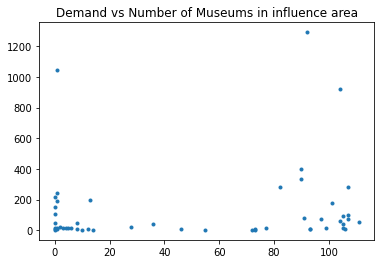

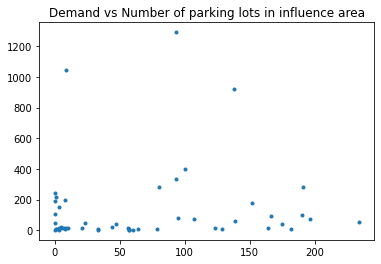

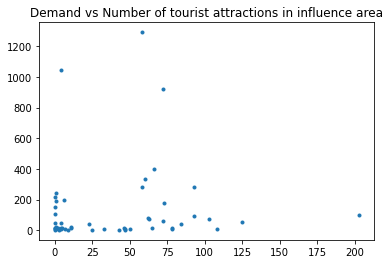

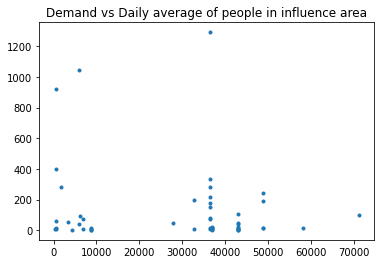

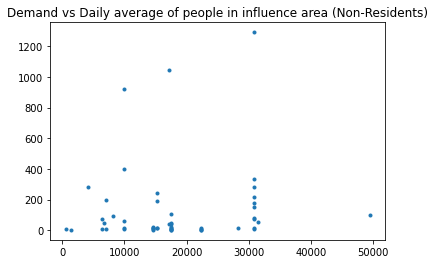

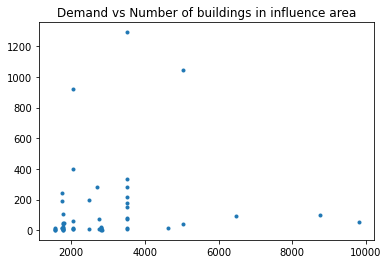

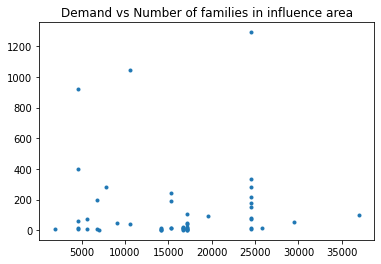

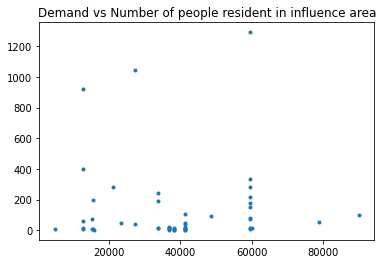

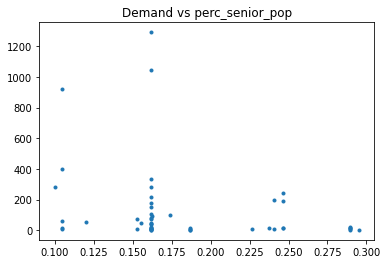

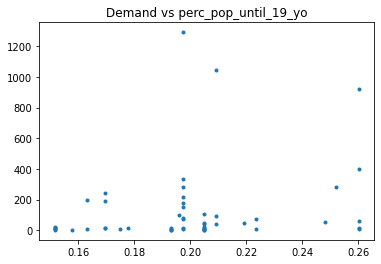

In [22]:
%matplotlib inline
 
# See some of the correlations between the demand and the variables in a graphic form - we see that the relationships between the variables are mostly non linear.
for i in range(len(X.columns)):
    %matplotlib inline
    plt.plot(X.iloc[:,i].values, y.iloc[:,0].values, '.')
    plt.title(f"Demand vs {X.columns[i]}")
    plt.show()

In [23]:
import seaborn as sns
def correlation_matrix(data_df):
        """Builds the correlation matrix with the respective columns and returns it

        Returns:
        -------

            plt.show(): returns plt graph that is a correlation matrix between
            some of the relevant variables in the dataset.
        """

        df_corr = data_df
        corr_matrix = df_corr.corr()
        plt.subplots(figsize=(12, 8))

        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(200, 20, as_cmap=True)

        # Draw the heatmap with the mask and correct aspect ratio
        sns.heatmap(
            corr_matrix,
            mask=mask,
            cmap=cmap,
            annot=True,
            vmax=0.3,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.5},
        )

        plt.title("\nCorrelation Matrix", {"fontsize": 16})

        return plt.show()

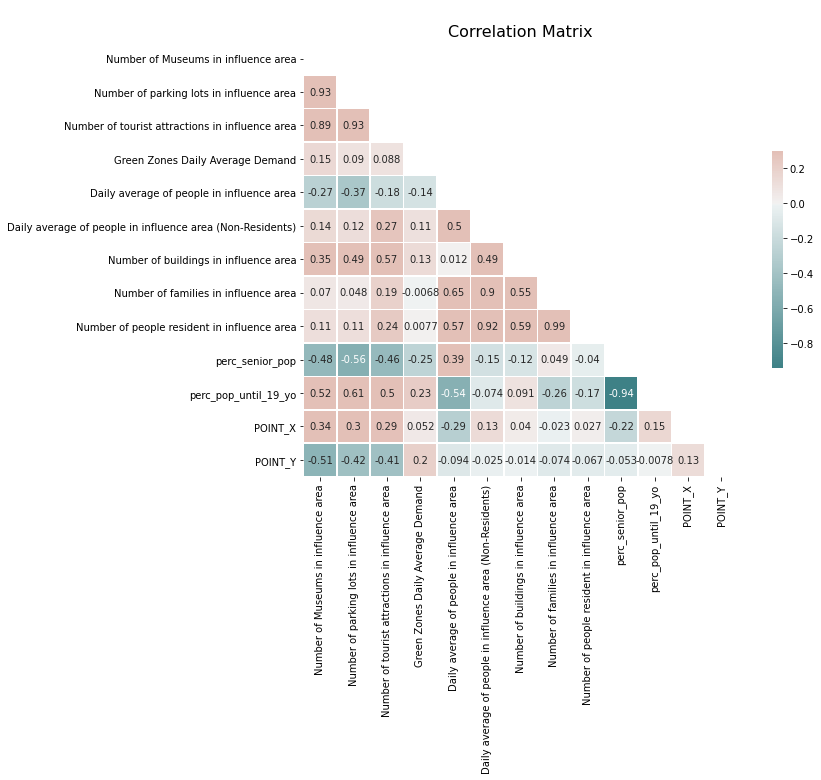

In [24]:
correlation_matrix(df_lisboa)

# Relevant Green Zones Demand Correlation in Lisbon: 

There are 2 important **positive correlations** with Green Areas demand:

- Percentage of people until 19 years old (23% correlation): Does this mean the green spaces are used by families and teenagers? It's something that we have to investigate further.

- Number of Museums in Influence Area (15% correlation): Most of the green spaces are used by people that go see turist/cultural attractions? Is it mainly used by tourists? These are all questions that would be important to clear out.


There is 1 important **negative correlation** with Green Areas demand:

- Percentage of Senior Population (-25%): Why don't senior people in the area use the green areas? Is it because there are a lot of ups and downs in the streets when you go to the green areas by foot? How is the accessbility for senior people to reach these areas? Most probably something has to be done about this (if it's the real cause, something we can't infer from correlation).

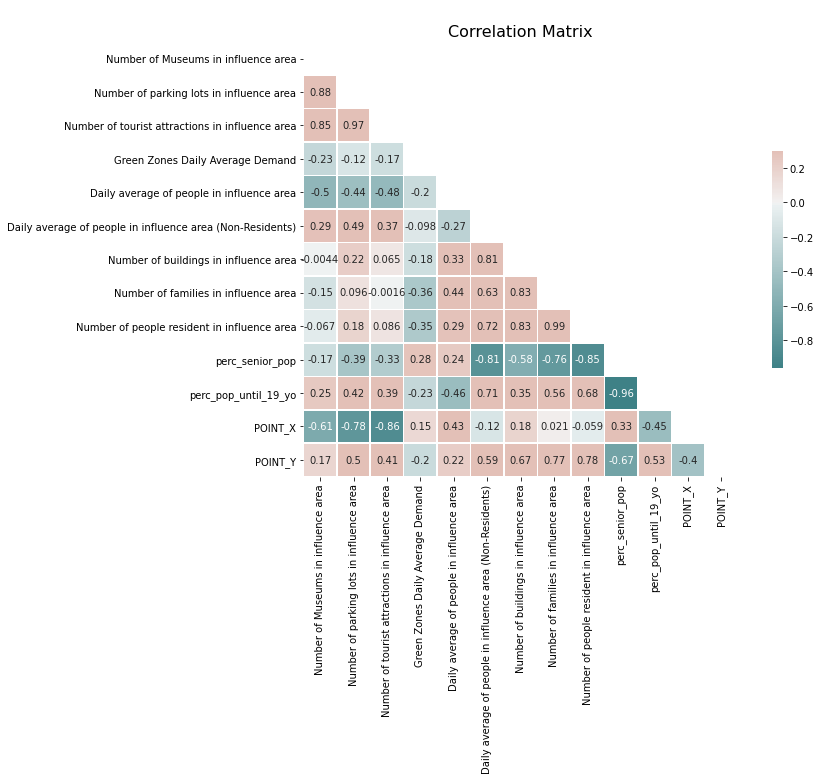

In [25]:
correlation_matrix(df_porto)

# Relevant Green Zones Demand Correlation in Porto: 

The correlation distribution is vastly different in Porto. For example, most of the variables have a negative correlation, something that isn't seen when we analyze the case of Lisbon.

Another interesting point is that the percentage of senior population is the variable with the highest positive correlation and the percentage population until 19 years old is actually the variable with the highest negative correlation! Why does this happen? Are the two cities that different?

A possiblity to explain this difference in both cities is that we have a ver low number of data points in both datasets (especially the Porto one) making this analysis biased.

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [31]:
numeric_features = X_train.columns#['vehicle_year', 'engine_capacity_bins', 'engine_power_bins', 'damaged', 'is_business']
numeric_pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(numeric_features)),
    ('scaler', MinMaxScaler())
])

preprocessing_pipeline = ColumnTransformer([
        ("num", numeric_pipeline, numeric_features),
    ], remainder='passthrough', sparse_threshold=0)

In [32]:
# Use the preprocessing pipeline with a simple linear regressor
linear_model_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('linear', LinearRegression()) 
])

# Performing 5-fold cross-validation with the linear model pipeline on the training set to 
# get a more real prediction sand not have overfitting affect the score.
y_train_pred = cross_val_predict(linear_model_pipeline, X_train, 
                           y_train, cv=10)


In [33]:
# Calculating MSE, RMSE, R2 Score

def scores(y_true, y_pred):
    print('The R2 score with cross-validation is', r2_score(y_true=y_true, y_pred=y_pred))
    print('Mean Squared Error with cross-validation is', mean_squared_error(y_true, y_pred))
    print('The RMSE with cross-validation is', mean_squared_error(y_true, y_pred, squared=False))
    print('Mean Absolute Error with cross-validation is', mean_absolute_error(y_true, y_pred))

In [34]:
scores(y_train, y_train_pred)

The R2 score with cross-validation is -0.5321350900864339
Mean Squared Error with cross-validation is 128798.94571851283
The RMSE with cross-validation is 358.88570007526465
Mean Absolute Error with cross-validation is 242.10028049919904


In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Changing the Simple Linear Model for the Ridge and Lasso Regression

# Use it with a classifier/regressor
lasso_model_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('lasso', Lasso()) 
])


# Performing 3-fold cross-validation with the lasso model pipeline on the training set to 
# get a more real prediction sand not have overfitting affect the score.
# This time, 3-fold cross-validation is done just because it takes a long time to run.
y_train_pred = cross_val_predict(lasso_model_pipeline, X_train, 
                           y_train, cv=10)

# Calculating MSE, RMSE, R2 Score
scores(y_train, y_train_pred)

The R2 score with cross-validation is -0.4868150779001037
Mean Squared Error with cross-validation is 124989.11861689597
The RMSE with cross-validation is 353.5380016587976
Mean Absolute Error with cross-validation is 235.7819738280779


In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Use it with a classifier/regressor
ridge_model_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('ridge', Ridge()) 
])

# Performing 3-fold cross-validation with the ridge model pipeline on the training set to 
# get a more real prediction sand not have overfitting affect the score.
# This time, 3-fold cross-validation is done just because it takes a long time to run.
y_train_pred = cross_val_predict(ridge_model_pipeline, X_train, 
                           y_train, cv=10)


# Calculating MSE, MAE, RMSE, R2 Score
scores(y_train, y_train_pred)

The R2 score with cross-validation is -0.2307851582425522
Mean Squared Error with cross-validation is 103465.96185502855
The RMSE with cross-validation is 321.6612532696914
Mean Absolute Error with cross-validation is 193.8189525274169


In [37]:
# Use it with a classifier/regressor
dt_model_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('dt', DecisionTreeRegressor()) 
])

# Performing 3-fold cross-validation with the decision tree model pipeline on the training set to 
# get a more real prediction sand not have overfitting affect the score.
# This time, 3-fold cross-validation is done just because it takes a long time to run.
y_train_pred = cross_val_predict(dt_model_pipeline, X_train, 
                           y_train, cv=10)


# Calculating MSE, MAE, RMSE, R2 Score
scores(y_train, y_train_pred)

The R2 score with cross-validation is -1.5446173244518522
Mean Squared Error with cross-validation is 213913.2709426896
The RMSE with cross-validation is 462.50759014603165
Mean Absolute Error with cross-validation is 250.14126155263156


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create the parameter grid for grid hyperparameter search
param_grid = {
    'max_depth': range(80, 100, 5),
    'min_samples_leaf': [3, 5, 8, 11],
    'n_estimators': range(100, 200, 10)
}

rf_clf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [57]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [58]:
y_train_pred = cross_val_predict(grid_search.best_estimator_, X_train, 
                           y_train['Green Zones Daily Average Demand'], cv=10)

In [59]:
scores(y_train, y_train_pred)

The R2 score with cross-validation is -0.25964269087017455
Mean Squared Error with cross-validation is 105891.87051185963
The RMSE with cross-validation is 325.4103110103606
Mean Absolute Error with cross-validation is 194.75675912710858


In [60]:
# Random Forest Model on the test set
y_test_pred = cross_val_predict(grid_search.best_estimator_, X_test, 
                           y_test['Green Zones Daily Average Demand'], cv=10)

scores(y_test, y_test_pred)

The R2 score with cross-validation is -0.25198289187231104
Mean Squared Error with cross-validation is 21792.47700193158
The RMSE with cross-validation is 147.62275231796616
Mean Absolute Error with cross-validation is 118.77533502439331


In [62]:
# Ridge Model on the test set
y_test_pred = cross_val_predict(ridge_model_pipeline, X_test, 
                           y_test['Green Zones Daily Average Demand'], cv=10)

scores(y_test, y_test_pred)

The R2 score with cross-validation is -1.0618257155122026
Mean Squared Error with cross-validation is 35888.900542479154
The RMSE with cross-validation is 189.44366060251042
Mean Absolute Error with cross-validation is 160.55739578584976




### **Because the Random Forest Model performed better than the Ridge model in both the training and test dataset, we will assume Random Forest as our best model.**

However, the results of our best model aren't satisfatory: it has a negative R2, the MAE and RMSE are too big to make any good predictions. We believe this is because we have around 60 data points.


### **Biggest Limitation:**

This simple model is still lacking a lot - **its performance is especially poor because of the reduced dataset we have**. Unfortunately, for this reason, w**e can't say that the results from this model are promising.**

#### **Future Work in terms of model building when more data points are available:**

- Do K-Means - simple, effective and interpretable;

- Try the models with more data points and features (namely public tranportation accessibility and possibly a "purpose" column that would categorize why most of the citizens go there (is it for pleasure? for the kids? for culture?...))

- Hypertuning the Random Forest even further.

- Stacking different models might also give us a better result.